# 1. Contextualização

O crescimento do mercado de dados no Brasil, evidenciado por pesquisas recentes como o State of Data BR 2023, reforça a importância de compreender os fatores que influenciam a remuneração dos profissionais da área. A correta análise desses fatores pode apoiar estratégias de retenção de talentos, definição de salários e planejamento de carreira.

Neste projeto, modelamos a previsão da faixa salarial com base em variáveis divididas em três grupos: fatores demográficos (faixa etária, gênero, raça/etnia, escolaridade), fatores profissionais (experiência prévia em dados, nível de senioridade, função de gestão, porte da empresa) e fatores modernos (modelo de trabalho e uso de Inteligência Artificial).

A abordagem prevê a utilização de técnicas de machine learning supervisionado para entender a relação entre as variáveis independentes e a variável dependente (faixa salarial). A análise dos resultados permitirá identificar quais fatores possuem maior impacto no salário e em que magnitude, contribuindo para uma compreensão mais estruturada do cenário atual do mercado de dados no Brasil.

# 2. Pré-processamento

## 2.1 Leitura de dados

Essa célula realiza a leitura do Dataset.

In [20]:
import pandas as pd

def get_file_path():
    import os
    # Load the data
    if os.path.exists('/kaggle'):
        file_path = '/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv'
    else:
        default_directory = './'
        os.chdir(default_directory)
        file_path = './input/state-of-data-brazil-2023⁄State_of_data_BR_2023_Kaggle.csv'
    return file_path

# Carregando o DataFrame
file_path = get_file_path()
df = pd.read_csv(file_path)

# Agrupamento de Faixas Salariaias 
## Objetivo
Transformar as 14 faixas salariais originais em categorias mais significativas socialmente, utilizando o salário mínimo como o valor de 2023, de 1.302 reais.

| Faixa Consolidada | Intervalo Mensal | Múltiplos do SM | Inclusão Original |
|-------------------|------------------|-----------------|-------------------|
| **Até 1 SM** | ≤ R$ 1.302 | < 1x | Menos de R$ 1.000/mês |
| **1-2 SM** | R$ 1.303-2.604 | 1-2x | R$ 1.001-2.000/mês, R$ 2.001-3.000/mês |
| **2-3 SM** | R$ 2.605-3.906 | 2-3x | R$ 3.001-4.000/mês |
| **3-5 SM** | R$ 3.907-6.510 | 3-5x | R$ 4.001-6.000/mês |
| **5-10 SM** | R$ 6.511-13.020 | 5-10x | R$ 6.001-8.000/mês, R$ 8.001-12.000/mês |
| **10-15 SM** | R$ 13.021-19.530 | 10-15x | R$ 12.001-16.000/mês, R$ 16.001-20.000/mês |
| **15+ SM** | ≥ R$ 19.531 | 15x+ | Todas acima de R$ 20.001/mês |


In [21]:
# Definindo as novas faixas consolidadas
novas_faixas = {
    'Até 1 SM (≤ R$ 1.302)': [
        'Menos de R$ 1.000/mês'
    ],
    '1-2 SM (R$ 1.303-2.604)': [
        'de R$ 1.001/mês a R$ 2.000/mês',
        'de R$ 2.001/mês a R$ 3.000/mês'
    ],
    '2-3 SM (R$ 2.605-3.906)': [
        'de R$ 3.001/mês a R$ 4.000/mês'
    ],
    '3-5 SM (R$ 3.907-6.510)': [
        'de R$ 4.001/mês a R$ 6.000/mês'
    ],
    '5-10 SM (R$ 6.511-13.020)': [
        'de R$ 6.001/mês a R$ 8.000/mês',
        'de R$ 8.001/mês a R$ 12.000/mês'
    ],
    '10-15 SM (R$ 13.021-19.530)': [
        'de R$ 12.001/mês a R$ 16.000/mês',
        'de R$ 16.001/mês a R$ 20.000/mês'
    ],
    '15+ SM (≥ R$ 19.531)': [
        'de R$ 20.001/mês a R$ 25.000/mês',
        'de R$ 25.001/mês a R$ 30.000/mês',
        'de R$ 30.001/mês a R$ 40.000/mês',
        'Acima de R$ 40.001/mês'
    ]
}

# Função para recategorizar
def recategorizar_salario(faixa_original):
    for nova_faixa, faixas_originais in novas_faixas.items():
        if faixa_original in faixas_originais:
            return nova_faixa
    return 'Outros'  # Para qualquer valor não mapeado

# Aplicando a transformação
df['Faixa Salarial'] = df["('P2_h ', 'Faixa salarial')"].apply(recategorizar_salario)

# Ordem das novas faixas
ordem_novas_faixas = [
    'Até 1 SM (≤ R$ 1.302)',
    '1-2 SM (R$ 1.303-2.604)',
    '2-3 SM (R$ 2.605-3.906)',
    '3-5 SM (R$ 3.907-6.510)',
    '5-10 SM (R$ 6.511-13.020)',
    '10-15 SM (R$ 13.021-19.530)',
    '15+ SM (≥ R$ 19.531)'
]

# Análise descritiva das novas faixas
freq_novas_faixas = df['Faixa Salarial'].value_counts().reindex(ordem_novas_faixas)
prop_novas_faixas = df['Faixa Salarial'].value_counts(normalize=True).reindex(ordem_novas_faixas)

print("Frequência das novas faixas:")
print(freq_novas_faixas)
print("\nProporções:")
print(prop_novas_faixas)

Frequência das novas faixas:
Faixa Salarial
Até 1 SM (≤ R$ 1.302)            30
1-2 SM (R$ 1.303-2.604)         503
2-3 SM (R$ 2.605-3.906)         352
3-5 SM (R$ 3.907-6.510)         745
5-10 SM (R$ 6.511-13.020)      1663
10-15 SM (R$ 13.021-19.530)     978
15+ SM (≥ R$ 19.531)            481
Name: count, dtype: int64

Proporções:
Faixa Salarial
Até 1 SM (≤ R$ 1.302)          0.005668
1-2 SM (R$ 1.303-2.604)        0.095031
2-3 SM (R$ 2.605-3.906)        0.066503
3-5 SM (R$ 3.907-6.510)        0.140752
5-10 SM (R$ 6.511-13.020)      0.314189
10-15 SM (R$ 13.021-19.530)    0.184772
15+ SM (≥ R$ 19.531)           0.090875
Name: proportion, dtype: float64


## 2.2 Análise descritiva
### Análise Descritiva: Distribuição Salarial por Nível e Faixa Etária

#### 1. Caracterização da Amostra

A amostra analisada apresenta a seguinte distribuição:

- *Faixa Etária*:
  - A maior concentração de participantes está entre 25-29 anos (31,25%), seguida pelas faixas de 30-34 anos (26,02%) e 35-39 anos (14,93%).
  - As faixas etárias mais jovens (17-24 anos) representam aproximadamente 12,68% da amostra.
  - Faixas acima dos 40 anos compõem 17,12% da amostra, indicando uma predominância de profissionais mais jovens no conjunto analisado.
  - A *moda* da faixa etária foi identificada em *25-29 anos*.

- *Nível de Senioridade*:
  - A maioria dos participantes se identifica como *Sênior* (36,79%) ou *Pleno* (36,09%), enquanto *Júnior* representa 27,12% da amostra.

Esses dados demonstram que a amostra é composta majoritariamente por profissionais em estágios intermediários e avançados da carreira, mas ainda relativamente jovens em termos de idade.

#### 2. Distribuição Salarial por Nível

O gráfico de distribuição salarial por nível evidencia um crescimento salarial com o avanço da senioridade:

- Profissionais *Júnior* concentram-se nas faixas de *2 a 5 salários mínimos*.
- Profissionais *Pleno* apresentam uma distribuição mais ampla, abrangendo de *2 até 10 salários mínimos*.
- Profissionais *Sênior* encontram-se majoritariamente nas faixas superiores, *entre 5 e 15 salários mínimos*.

Contudo, há uma sobreposição entre os níveis, com alguns profissionais Júnior e Pleno atingindo salários comparáveis aos de níveis mais elevados. Isso sugere que outros fatores, como especializações técnicas, tempo de experiência ou setor de atuação, influenciam significativamente a remuneração, além do nível formal de senioridade.

#### 3. Distribuição Salarial por Faixa Etária

A distribuição salarial por faixa etária reforça a tendência de aumento de salário com o avanço da idade:

- Profissionais entre *30 e 39 anos* apresentam maior predominância nas faixas salariais de *5 a 15 salários mínimos*.
- Indivíduos mais jovens (17-24 anos) concentram-se majoritariamente nas faixas de *até 5 salários mínimos*.
- A partir dos *45 anos*, observa-se maior dispersão salarial, com participantes tanto em faixas salariais mais baixas quanto em faixas mais altas.

Essa heterogeneidade entre as faixas etárias superiores pode indicar trajetórias profissionais variadas, incluindo transições de carreira, mudanças de setor e diferentes estratégias de progressão.

#### 4. Considerações Finais

A análise revela que tanto o nível de senioridade quanto a faixa etária estão positivamente associados à remuneração. Entretanto, a variabilidade observada dentro dos grupos destaca que outros fatores – como área de atuação, habilidades específicas, localidade e formação acadêmica – também exercem papel determinante na definição salarial.

A predominância de profissionais de nível intermediário/avançado na amostra é um aspecto importante a ser considerado para interpretações futuras ou comparações com outros contextos do mercado de trabalho.

/tmp/ipykernel_20693/2698576099.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[coluna_idade], order=ordem_idade, palette='Blues')


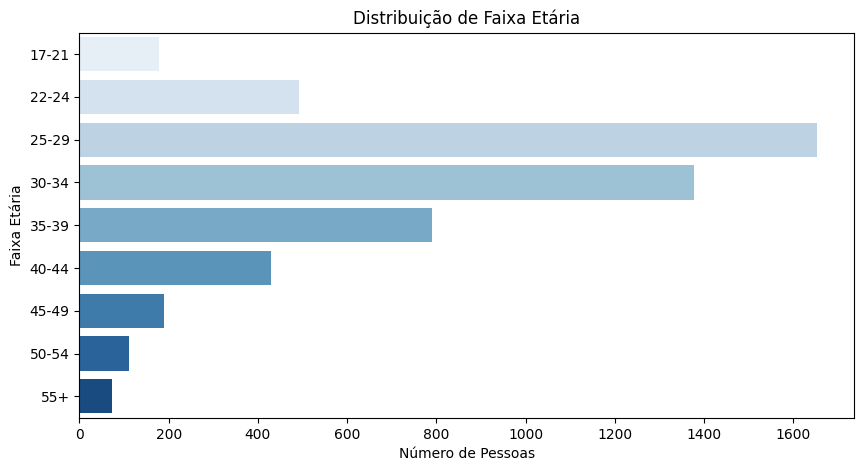

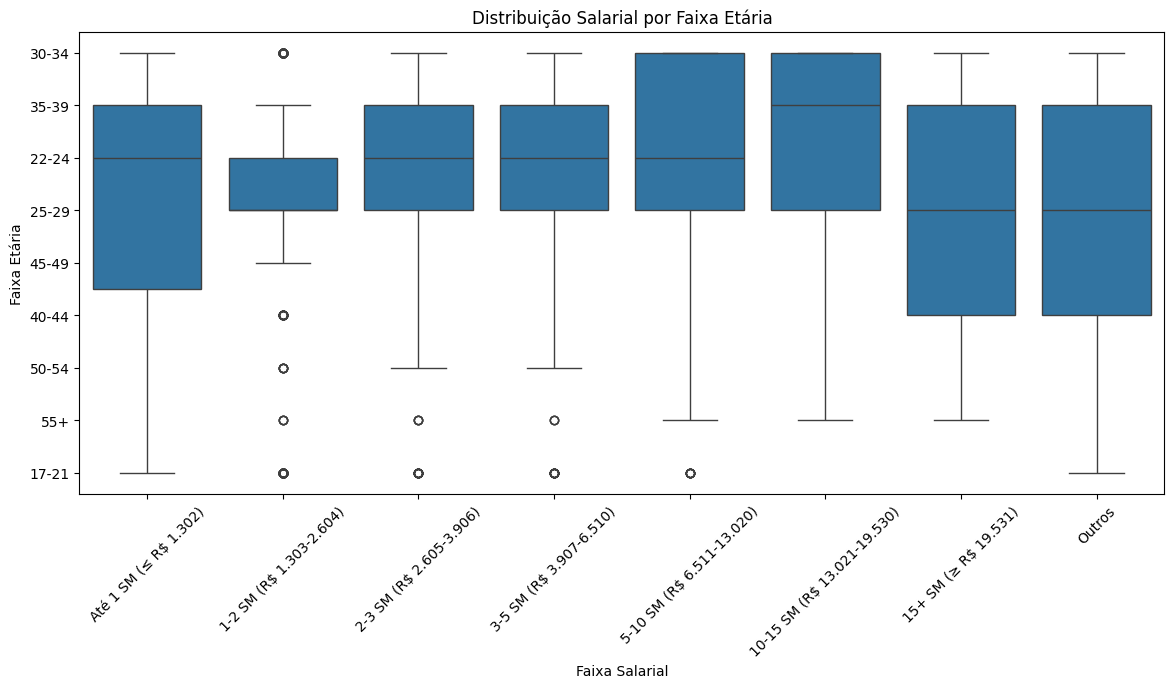


Moda da Faixa Etária: 25-29


/tmp/ipykernel_20693/2698576099.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[coluna_nivel], order=df[coluna_nivel].value_counts().index, palette='Greens')


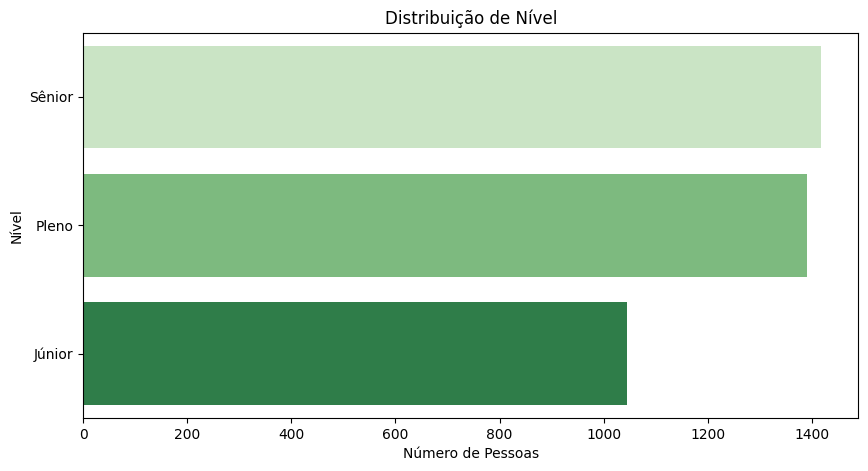

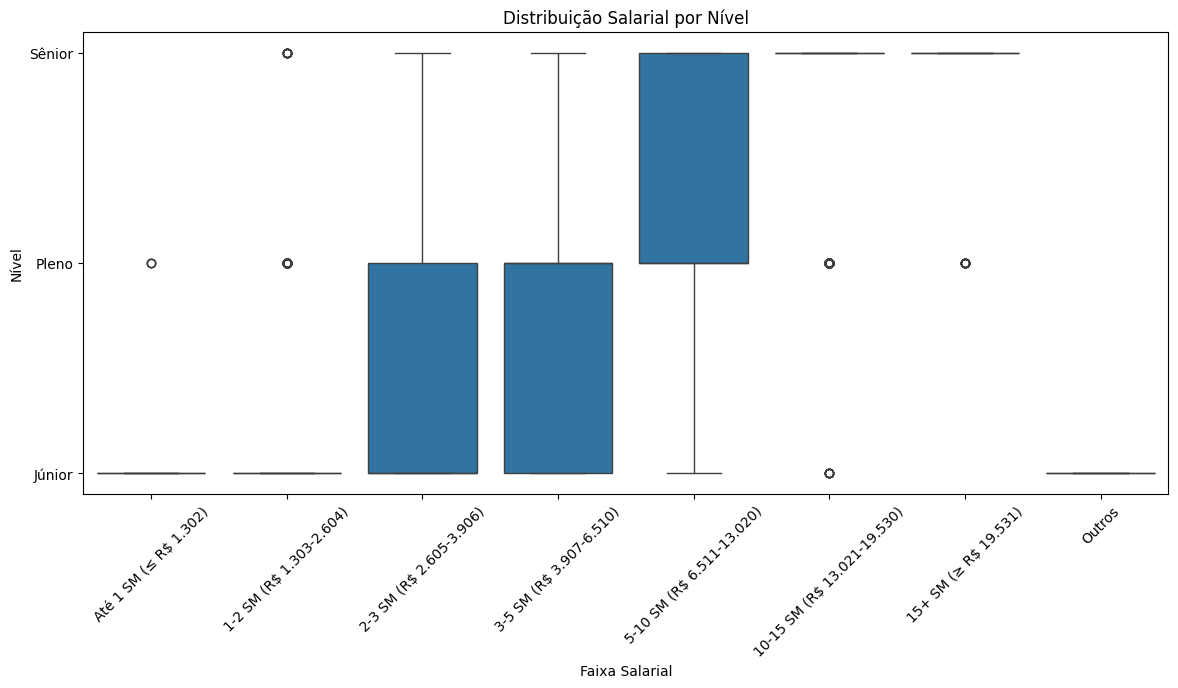


Moda do Nível: Sênior


In [34]:
# Análise Descritiva de Faixa Idade e Nível com foco em Faixa Salarial

import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis
coluna_idade = "('P1_a_1 ', 'Faixa idade')"
coluna_nivel = "('P2_g ', 'Nivel')"
coluna_salarial = "Faixa Salarial" 
ordem_categorias = [
        "Até 1 SM (≤ R$ 1.302)",
        "1-2 SM (R$ 1.303-2.604)",
        "2-3 SM (R$ 2.605-3.906)",
        "3-5 SM (R$ 3.907-6.510)",
        "5-10 SM (R$ 6.511-13.020)",
        "10-15 SM (R$ 13.021-19.530)",
        "15+ SM (≥ R$ 19.531)",
        "Outros"
]
ordem_idade = [
    '17-21',
    '22-24',
    '25-29',
    '30-34',
    '35-39',
    '40-44',
    '45-49',
    '50-54',
    '55+'
]

# ----------------------------------
# 1. Faixa Etária
# ----------------------------------

# print("Distribuição de Frequência - Faixa Idade")
# print(df[coluna_idade].value_counts())
# print("\n% Percentual:")
# print(df[coluna_idade].value_counts(normalize=True) * 100)

# Gráfico Univariado - Faixa Idade
plt.figure(figsize=(10,5))
sns.countplot(y=df[coluna_idade], order=ordem_idade, palette='Blues')
plt.title('Distribuição de Faixa Etária')
plt.xlabel('Número de Pessoas')
plt.ylabel('Faixa Etária')
plt.show()

# Gráfico Bivariado - Faixa Idade vs Faixa Salarial
plt.figure(figsize=(14,6))
sns.boxplot(x=coluna_salarial, y=coluna_idade, order=ordem_categorias, data=df)
plt.xticks(rotation=45)
plt.title('Distribuição Salarial por Faixa Etária')
plt.xlabel('Faixa Salarial')
plt.ylabel('Faixa Etária')
plt.show()

# Moda Faixa Idade
print(f"\nModa da Faixa Etária: {df[coluna_idade].mode().values[0]}")

# ----------------------------------
# 2. Nível (Júnior/Pleno/Sênior)
# ----------------------------------

# print("\nDistribuição de Frequência - Nível")
# print(df[coluna_nivel].value_counts())
# print("\n% Percentual:")
# print(df[coluna_nivel].value_counts(normalize=True) * 100)

# Gráfico Univariado - Nível
plt.figure(figsize=(10,5))
sns.countplot(y=df[coluna_nivel], order=df[coluna_nivel].value_counts().index, palette='Greens')
plt.title('Distribuição de Nível')
plt.xlabel('Número de Pessoas')
plt.ylabel('Nível')
plt.show()

# Gráfico Bivariado - Nível vs Faixa Salarial
plt.figure(figsize=(14,6))
sns.boxplot(x=coluna_salarial, y=coluna_nivel, order=ordem_categorias,  data=df)
plt.xticks(rotation=45)
plt.title('Distribuição Salarial por Nível')
plt.xlabel('Faixa Salarial')
plt.ylabel('Nível')
plt.show()

# Moda Nível
print(f"\nModa do Nível: {df[coluna_nivel].mode().values[0]}")


## 2.3 Transformação de variáveis

Aplicação de técnicas como one-hot encoding, padronização ou transformações logarítmicas.

In [41]:
# Transformação de variáveis

from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[["('P2_g ', 'Nivel')"]])

# Criando um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["('P2_g ', 'Nivel')"]))
df = pd.concat([df, encoded_df], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Idade_Padronizado'] = scaler.fit_transform(df[["('P1_a ', 'Idade')"]])

# df = pd.get_dummies(df, columns=['coluna_categorica'])
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['coluna_numerica']] = scaler.fit_transform(df[['coluna_numerica']])

## 2.4 Partição dos dados

Separação entre treino e validação.

In [24]:
# Partição dos dados
from sklearn.model_selection import train_test_split

# Exemplo:
# X = df.drop('variavel_dependente', axis=1)
# y = df['variavel_dependente']
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modelagem

## 3.1 Modelos manualmente definidos

Modelos com hiperparâmetros escolhidos manualmente.

In [25]:
# Modelo manual
# from sklearn.linear_model import LinearRegression
# model_lr = LinearRegression()
# model_lr.fit(X_train, y_train)

## 3.2 Modelos otimizados

Busca de melhores hiperparâmetros com Grid Search, Random Search ou Bayesian Optimization.

In [26]:
# Otimização de modelo
# from sklearn.model_selection import GridSearchCV
# params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
# grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, cv=5)
# grid.fit(X_train, y_train)

## 3.3 Avaliação de desempenho

Avaliação dos modelos com métricas como R², MAE e RMSE.

In [27]:
# Avaliação de desempenho
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# y_pred = model_lr.predict(X_val)
# print('R2:', r2_score(y_val, y_pred))
# print('MAE:', mean_absolute_error(y_val, y_pred))
# print('RMSE:', mean_squared_error(y_val, y_pred, squared=False))